In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


1. DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 3'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)#inplace=true for not reassigning df=df.rename
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
#for finding missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
df=df.drop_duplicates(keep='first')


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(5169, 2)

2.EDA

In [15]:
#ham=0 spam=1
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

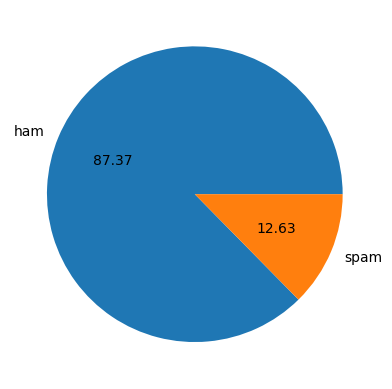

In [16]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%.2f")
plt.show()#for avoiding extra output code

In [17]:
# !pip install nltk
import nltk

In [18]:
#nltk.download('punkt')

In [19]:
#for counting number of characers used in each message
df['num_characters']=df['text'].apply(len)
df

C:\Users\vedan\AppData\Local\Temp\ipykernel_5512\1921134438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
#for counting number of words used in each message
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))#lambda x: defines an anonymous (inline) function that takes each row's text (x) as input.
df


C:\Users\vedan\AppData\Local\Temp\ipykernel_5512\3787723012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))#lambda x: defines an anonymous (inline) function that takes each row's text (x) as input.


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [21]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

C:\Users\vedan\AppData\Local\Temp\ipykernel_5512\1676715269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

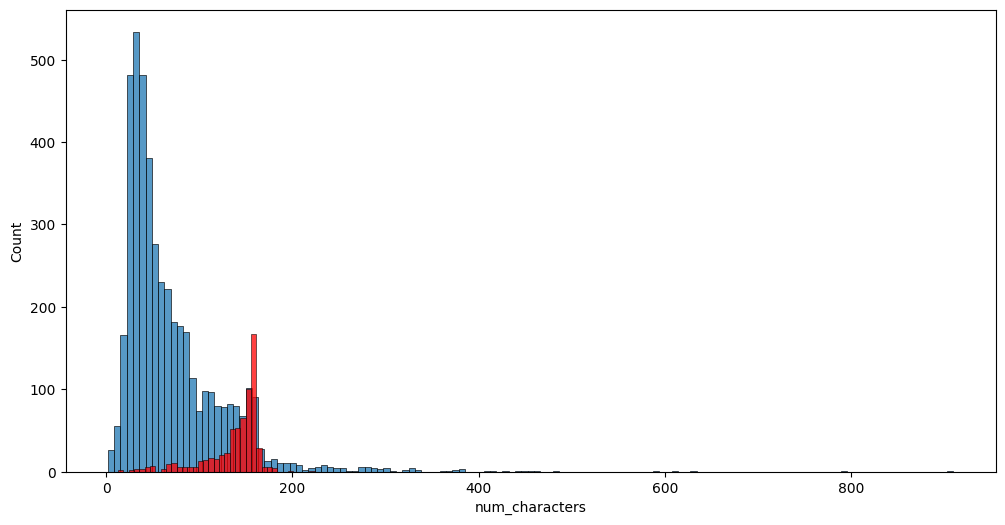

In [25]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

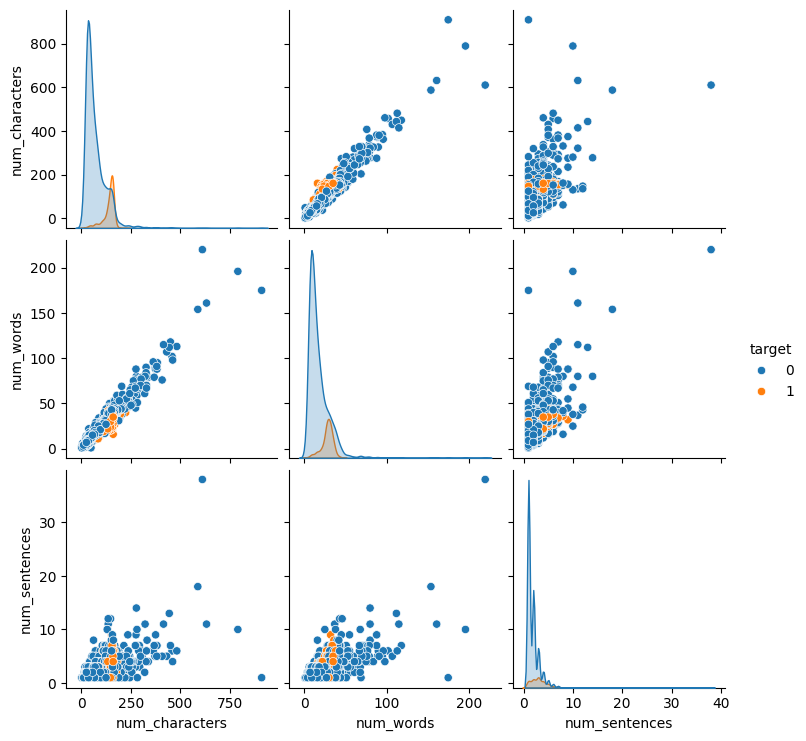

In [26]:
sns.pairplot(df,hue='target')

In [27]:
#sns.heatmap(df.corr(),annot=True)

DATA PREPROCESSING

In [28]:
#Steps for preprocessing
#Lower case
#tokenize
#Removing special characters: keep only alpha numeric characters
#Removing Stop words and punctuation
#Stemming : bringing word to original form


In [29]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]

    for w in text:
        if w.isalnum():
            y.append(w)
    
    text=y[:]
    y.clear()

    for w in text:
        if w not in stopwords.words('english') and w not in string.punctuation:
            y.append(w)

    text=y[:]
    y.clear()
    stemmer = PorterStemmer()
    for w in text:
        y.append(stemmer.stem(w))

    return " ".join(y)




In [30]:
import pickle
with open("transform_text","wb") as f:
    pickle.dump(transform_text,f)

In [31]:
transform_text("What is your name ?")

'name'

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

C:\Users\vedan\AppData\Local\Temp\ipykernel_5512\2799170265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
#%pip install wordcloud

In [35]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='red')


In [36]:
df[df['target']==1]['transformed_text'].str.cat()# .cat  concatenates all message as one string

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcvwinner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hourmobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 infourgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18xxxmobilemovieclub use credit click wap link next txt messag click httpengland v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wqthank subscript rington uk mobil charg pleas confirm repli ye repli charg07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrowsm ac sptv new jersey devil detroit red wing play i

In [37]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
spam_wc

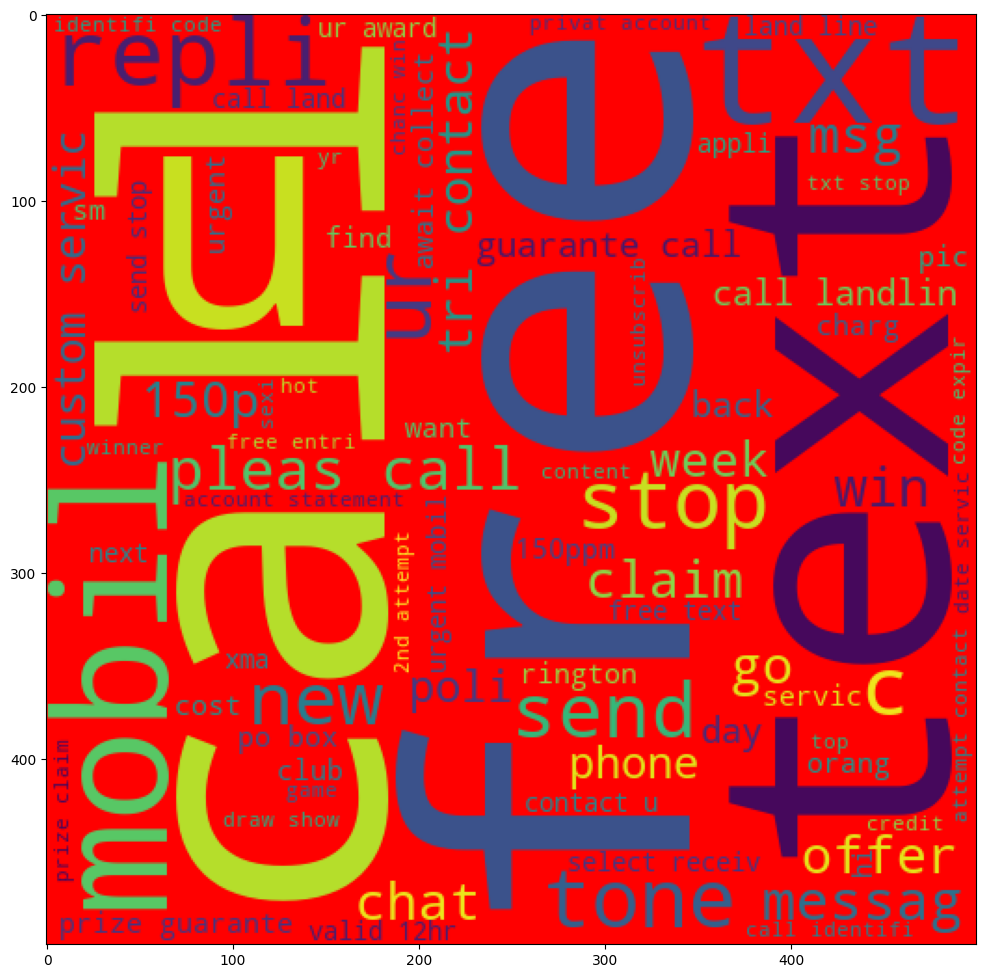

In [38]:
plt.figure(figsize=(12,18))
plt.imshow(spam_wc)

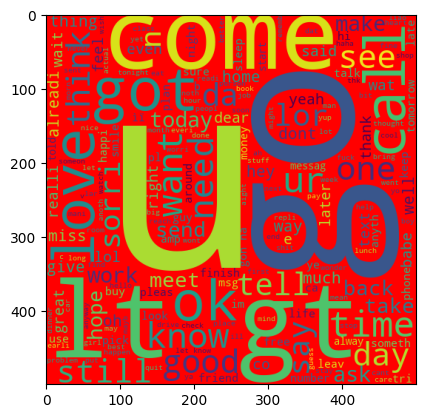

In [39]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [40]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


len(spam_corpus)

9939

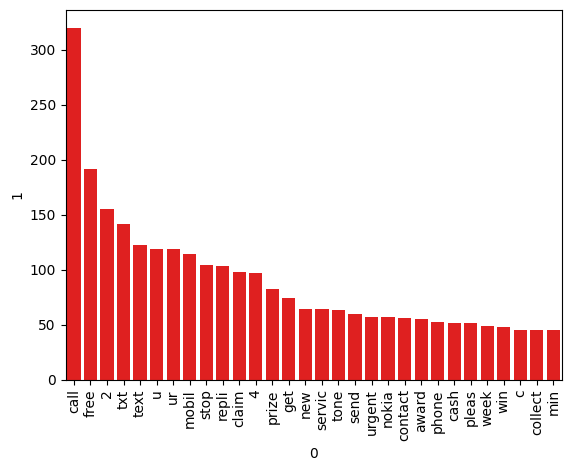

In [41]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color='red')
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


len(ham_corpus)

35404

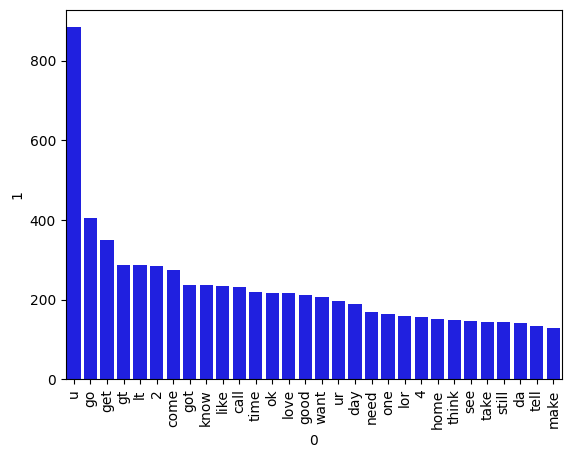

In [43]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color='blue')
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)#use only top 3000 words from corpus

In [45]:
#X=cv.fit_transform(df['transformed_text']).toarray()#text to numerical vector conversion
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [46]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [47]:
#appending num_characters column to input X
#X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [48]:
X.shape

(5169, 3000)

In [49]:
y=df['target'].values

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

ACCURACY: Correctness (hitting the target).	: TP+TN/TP+TN+FN+FP

PRECISION: Consistency (hitting the same spot repeatedly). : TP/TP+FP

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [54]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#best precison with tfidf 

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [55]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [56]:
#tfidf -> MNB


In [57]:
#%pip install xgboost

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
# Use L1 (penalty='l1') when you need feature selection.
# Use L2 (penalty='l2') when you want to prevent overfitting without removing features.
rfc=RandomForestClassifier(n_jobs=-1,n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=42)
bc=BaggingClassifier(n_estimators=50,random_state=42)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [62]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():

    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy: ",current_accuracy)
    print("Precison: ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy:  0.9758220502901354
Precison:  0.9747899159663865


c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

For KN
Accuracy:  0.9052224371373307
Precison:  1.0
For NB
Accuracy:  0.9709864603481625
Precison:  1.0
For DT
Accuracy:  0.9303675048355899
Precison:  0.83
For LR
Accuracy:  0.9555125725338491
Precison:  0.96
For RF
Accuracy:  0.9738878143133463
Precison:  0.9826086956521739


c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy:  0.9690522243713733
Precison:  0.9732142857142857
For BgC
Accuracy:  0.9593810444874274
Precison:  0.8636363636363636
For ETC
Accuracy:  0.9748549323017408
Precison:  0.9745762711864406
For GBDT
Accuracy:  0.9506769825918762
Precison:  0.9306930693069307
For xgb
Accuracy:  0.965183752417795
Precison:  0.9396551724137931


In [63]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
6,AdaBoost,0.969052,0.973214
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.959381,0.863636


In [64]:
#pd.melt() is used to convert wide-format data into long-format.
performance_df1=pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,AdaBoost,Accuracy,0.969052
6,LR,Accuracy,0.955513
7,xgb,Accuracy,0.965184
8,GBDT,Accuracy,0.950677
9,BgC,Accuracy,0.959381


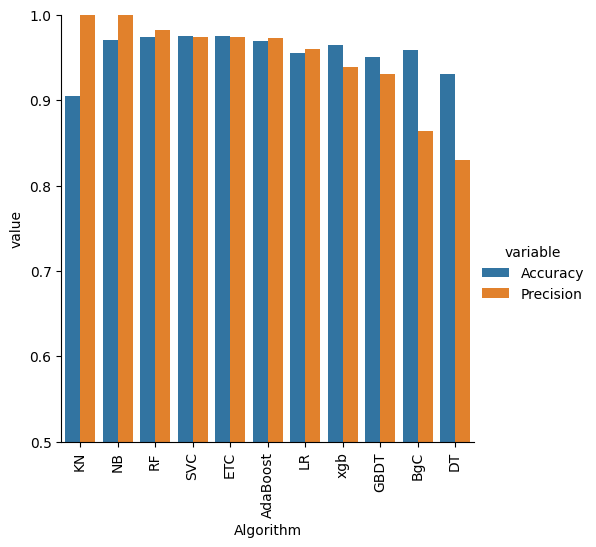

In [65]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

IMPORVING THE MODEL

In [66]:
#Voting Classifier
#taking best models and combining them 

svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [67]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [68]:
#Applying Stacking

In [69]:
# Feature	            Voting Classifier	                        Stacking Classifier
# How It Works?	        Averages multiple models’ predictions	    Uses a meta-model to combine predictions
# Complexity	        Simple	                                    More complex
# Training	            No extra training step	                    Trains a second-level model
# Final Decision	    Majority (hard) or average (soft)	        Meta-model decides based on features
# Computational Cost	Lower	                                    Higher

In [70]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier(n_jobs=-1)

from sklearn.ensemble import StackingClassifier

clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [71]:
# How Stacking Works?
# Train Base Models (Estimators)

# Multiple models (e.g., SVM, Naïve Bayes, Extra Trees) are trained independently on the dataset.
# Each model makes predictions.
# Generate New Features (Meta Features)

# Instead of making a final prediction directly, stacking collects predictions from the base models and uses them as new features.
# The original input features can also be included (optional).
# Train the Final Estimator (Meta-Model)

# A second model (final_estimator) is trained using the predictions of base models as input.
# This model learns how to combine the outputs of different models.
# Final Prediction

# When making new predictions, the base models first generate outputs.
# The final_estimator then combines these outputs to give the final prediction.

In [75]:
mnb.fit(X_train,y_train)#********* IMPORTANT

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
#%pip install streamlit